Test Accuracy: 0.7365
Test Accuracy: 0.5665


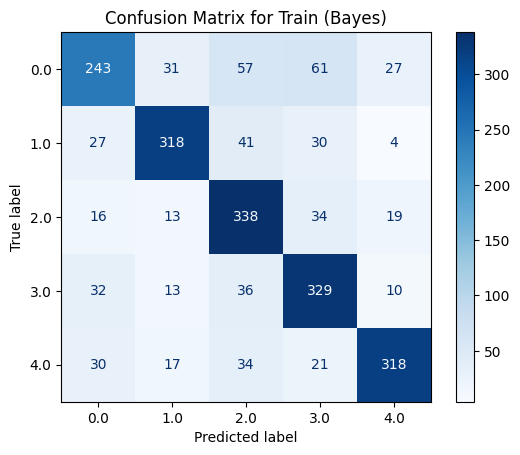

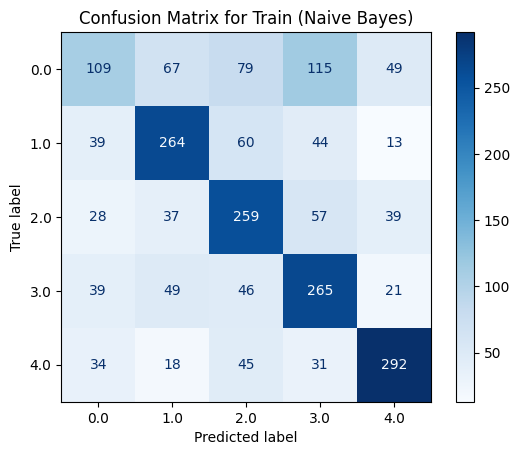

In [2]:
#DATASET 3 BAYES GAUSSIAN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


class GaussianBayesClassifier:
    def __init__(self):
        self.classes = None
        self.means = None
        self.covariances = None
        self.priors = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        self.means = np.zeros((n_classes, n_features))
        self.covariances = np.zeros((n_classes, n_features, n_features))
        self.priors = np.zeros(n_classes)
        
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[idx] = np.mean(X_c, axis=0)
            self.covariances[idx] = np.cov(X_c.T)
            self.priors[idx] = len(X_c) / len(X)

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        posteriors = []
        
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            inv_cov = np.linalg.inv(self.covariances[idx])
            diff = x - self.means[idx]
            
            log_likelihood = -0.5 * np.dot(np.dot(diff.T, inv_cov), diff)
            log_likelihood -= 0.5 * np.log(np.linalg.det(self.covariances[idx]))
            log_likelihood -= len(self.classes) * 0.5 * np.log(2 * np.pi)
            
            posterior = prior + log_likelihood
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]

#Naive bayes
class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.means = None
        self.variances = None
        self.priors = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        
        self.means = np.zeros((n_classes, n_features))
        self.variances = np.zeros((n_classes, n_features))
        self.priors = np.zeros(n_classes)
        
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[idx, :] = X_c.mean(axis=0)
            self.variances[idx, :] = X_c.var(axis=0)
            self.priors[idx] = len(X_c) / len(X)

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        posteriors = []
        
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            posterior = prior
            #calculating posterior prob. fopr each feature
            for feat, mean, var in zip(x, self.means[idx], self.variances[idx]):
                posterior += self._log_gaussian_pdf(feat, mean, var)
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]

    def _log_gaussian_pdf(self, x, mean, var):
        return -0.5 * np.log(2 * np.pi * var) - 0.5 * ((x - mean) ** 2) / var





#-------TRAIN DATA
def load_data(filename, labelfilename):
    data = np.genfromtxt(filename, delimiter=',', skip_header=1)
    X = data[:, :36]  # Adjust to 36 features
    y =  pd.read_csv(labelfilename, header=None, skiprows=1).values.ravel()
    return X, y

# Load and prepare the data
X_train, y_train = load_data('./team20/Dataset-3/train_data.csv', './team20/Dataset-3/train_label.csv')  # Replace with actual file path
X_test, y_test = load_data('./team20/Dataset-3/train_data.csv', './team20/Dataset-3/train_label.csv')

# Create and train the classifier
classifier = GaussianBayesClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")



# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Train (Bayes)')
plt.savefig("./d3-cm-bayes-train.svg", format="svg", dpi=300)

#-------------

# Create and train the classifier
classifier = NaiveBayesClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")



# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)



# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Train (Naive Bayes)')
plt.savefig("./d3-cm-naive-train.svg", format="svg", dpi=300)


Test Accuracy: 0.5426
Test Accuracy: 0.5376


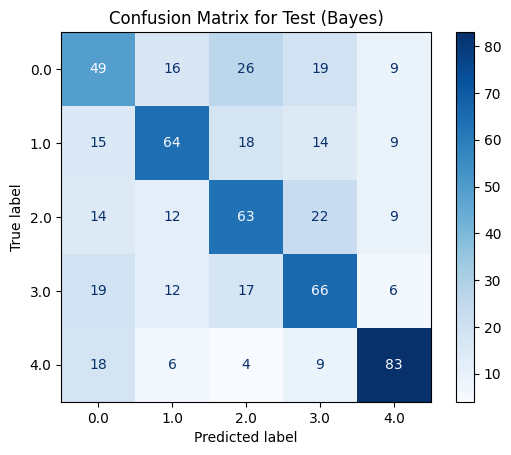

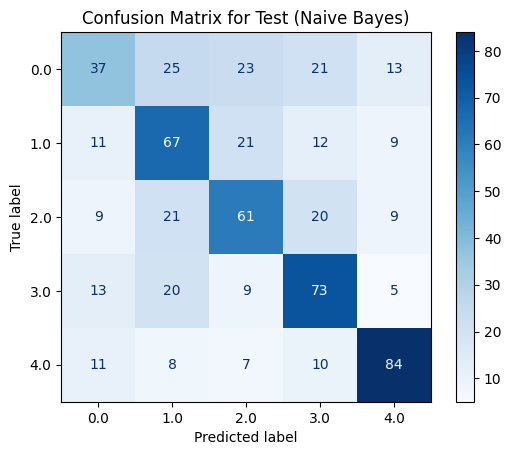

In [3]:

#-------TEST DATA

# Load and prepare the data
X_train, y_train = load_data('./team20/Dataset-3/train_data.csv', './team20/Dataset-3/train_label.csv')  # Replace with actual file path
X_test, y_test = load_data('./team20/Dataset-3/test_data.csv', './team20/Dataset-3/test_label.csv')

# Create and train the classifier
classifier = GaussianBayesClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")



# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test (Bayes)')
plt.savefig("./d3-cm-bayes-test.svg", format="svg", dpi=300)


#-------------

# Create and train the classifier
classifier = NaiveBayesClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")



# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)



# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test (Naive Bayes)')
plt.savefig("./d3-cm-naive-test.svg", format="svg", dpi=300)


Test Accuracy: 0.5853


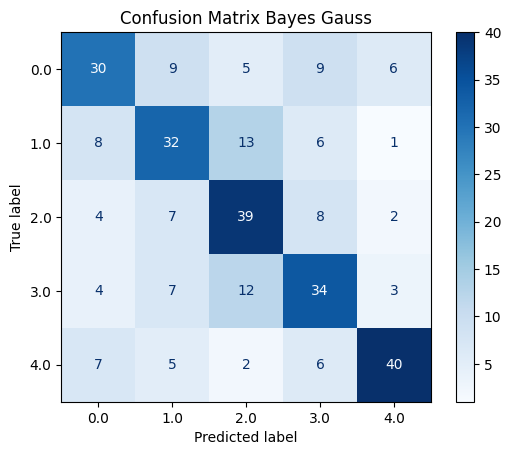

Test Accuracy: 0.5819


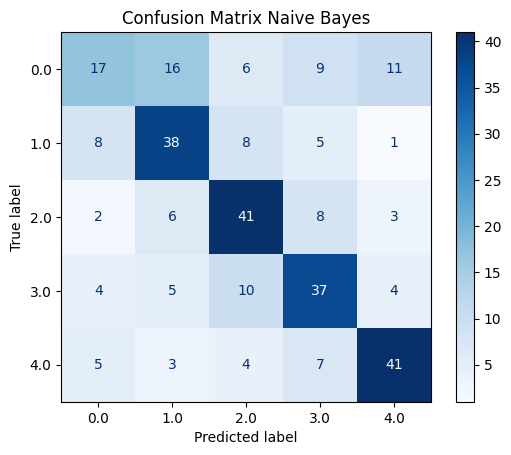

In [3]:

#-------VALIDATION DATA

# Load and prepare the data
X_train, y_train = load_data('./team20/Dataset-3/train_data.csv', './team20/Dataset-3/train_label.csv')  # Replace with actual file path
X_test, y_test = load_data('./team20/Dataset-3/val_data.csv', './team20/Dataset-3/val_label.csv')

# Create and train the classifier
classifier = GaussianBayesClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")



# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Bayes Gauss')
plt.show()


#-------------

# Create and train the classifier
classifier = NaiveBayesClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")



# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)



# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Naive Bayes')
plt.show()
